_This notebook will show how to determine if a person will be able to pay a loan. I will be using various methods to determine the degree of accuracy_



In [6]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
#importing dataset 
#------------------------------
#dataset url  = http://bit.ly/BreastCancersDataset
#------------------------------
#see the entire content of the dataframe
pd.set_option('display.max_columns', None)

data = pd.read_csv('https://raw.githubusercontent.com/studygyaan/Loan-prediction-using-logistic-regression/master/train.csv')
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
#getting summary of the numerical variables
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [122]:
#check for missiong values
#--------------------------
# PS from the data cleaning, it should be zero  for all columns
# Relfecting that no data is missing
data.apply(lambda x: sum(x.isnull()), axis = 0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())

In [18]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

In [24]:
data = data.dropna()
print(data.shape)

(542, 13)


 # Distribution Analysis
 We shall  look at the various distributions of the variables

<AxesSubplot:>

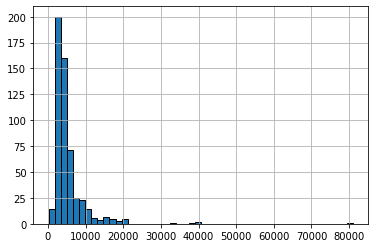

In [29]:
data['ApplicantIncome'].hist(bins = 50, edgecolor = 'black')
# From the graph we observe that there is a skewed distibution with, a high number
#indidividuals earning low income

<AxesSubplot:>

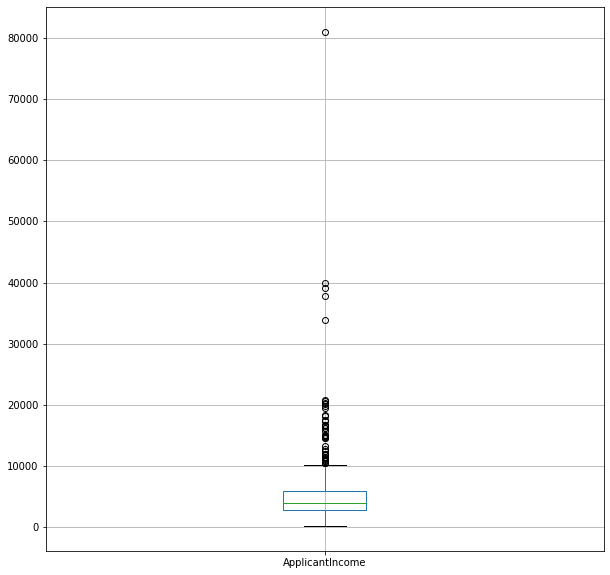

In [36]:
#we shall make the same observation using box-plot
plt.figure(figsize=(10,10))
data.boxplot(column = 'ApplicantIncome')
# The box plot affirms the presence of extreme values, that can be attributed
# to income disparity in the society.
#Hypothesis can be made around the need for education and the work experience that 
# is needed in many job interviews

<Figure size 720x720 with 0 Axes>

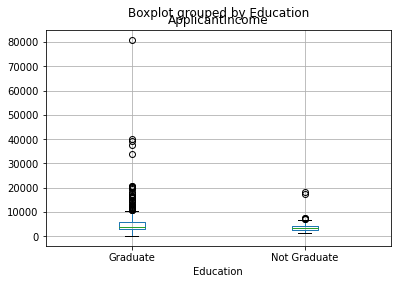

In [42]:
plt.figure(figsize=(10,10))
data.boxplot(column = 'ApplicantIncome', by ='Education')
plt.show()
# We do not have a substantional difference between the mean income of graduates and 
# not graduates, the higher number if graduates with very high incomes, appear as
# outliers


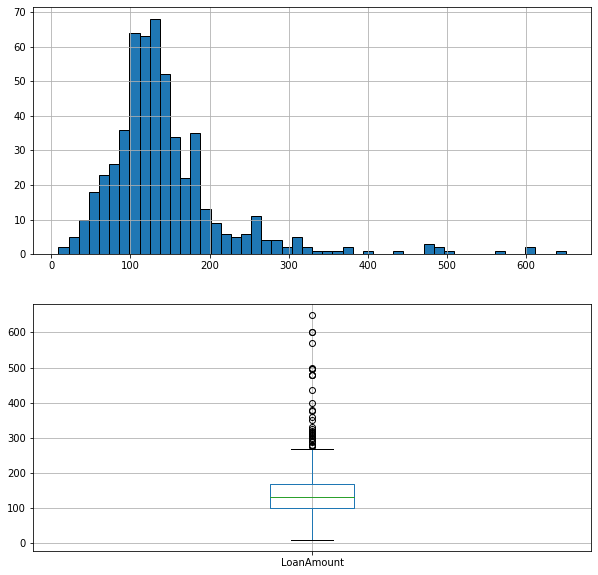

In [60]:
plt.figure(figsize = (10, 10))
plt.subplot(211)
data['LoanAmount'].hist(bins = 50, edgecolor = 'black')
plt.subplot(212)
data.boxplot(column = 'LoanAmount')

plt.show()
#we shall also have it inform of natural log inorder to deal with
# the extreme values

In [77]:
temp1 = data['Credit_History'].value_counts(ascending=True)
temp1
temp2 = data.pivot_table(values='Loan_Status', index=['Credit_History']
                        , aggfunc = lambda x: x.map({'Y':1, 'N':0}).mean())
print('Frequency Table for credit History')
print(temp1)

print('\nProbability of getting a loan for each Credit History Class:')
print(temp2)

Frequency Table for credit History
0.0     74
1.0    468
Name: Credit_History, dtype: int64

Probability of getting a loan for each Credit History Class:
                Loan_Status
Credit_History             
0.0                0.094595
1.0                0.788462


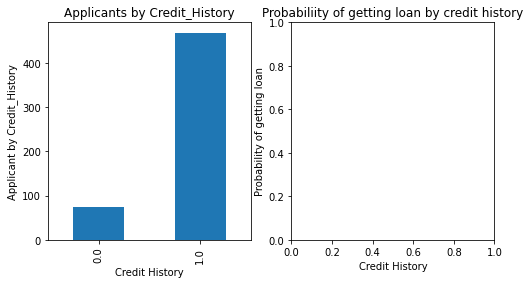

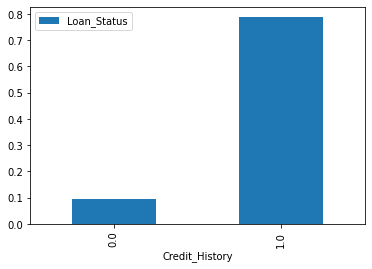

In [102]:
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit History')
ax1.set_ylabel("Applicant by Credit_History")
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probabiliity of getting loan by credit history")
plt.show()
# the chances of getting a loan with previous credit history is 8X higher than
# with no credit.

In [115]:
# we shall define a function that will help us evaluate other 
# variables in the data set , marriage and self-employed

def _plots(x , y):
    temp = pd.crosstab(x, y)
    temp.plot(kind = 'bar', stacked = True, color = ['red', 'blue', 'green'], grid
              = False)
    plt.show()
    

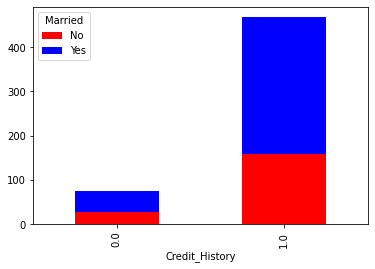

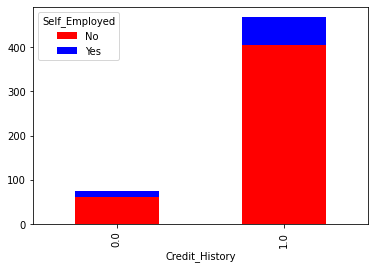

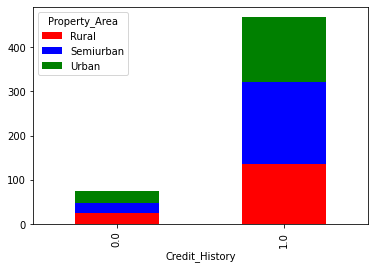

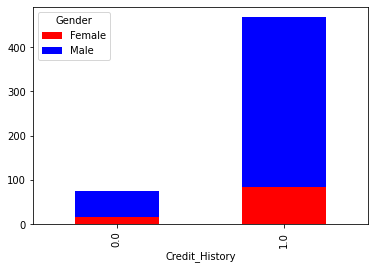

In [117]:
#calling the function 
_plots(data['Credit_History'], data['Married'])
_plots(data['Credit_History'], data['Self_Employed'])
_plots(data['Credit_History'], data['Property_Area'])
_plots(data['Credit_History'], data['Gender'])
# From the vizualization we notice that
# 1. Married applicants have a more credit history, individuals without
# who are not self-employed  and have acredit history are more, while the 
#distribution of applicants based on property area is almost equal on both areas

<Figure size 1008x648 with 0 Axes>

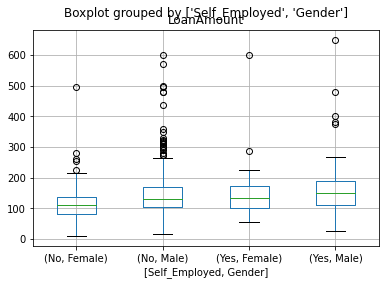

In [144]:
# Some more expolratory analysis
plt.figure(figsize = (14, 9))
data.boxplot(column = 'LoanAmount', by= ['Self_Employed', 'Gender'])
plt.show()
# From the box-plots we see that males who are not self-employed are are the 
# ones who are taking loans as opposed to their female counter parts

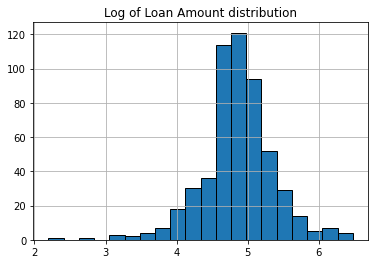

In [154]:
# we shall further look into dealing with the extreme values
#data['LoanAmount'].hist(bins=50, edgecolor = 'black')
data['LoanAmount_log'] = np.log(data['LoanAmount'])
data['LoanAmount_log'].hist(bins = 20, edgecolor = 'black')
plt.title('Log of Loan Amount distribution')
plt.show()
# Here we have a normal distribution of the loan amounts, with most of the effect 
# from the exteme values being subsidized

In [169]:
# We can further look into loan amount and the Total income and make an 
# analysis of it 
# Taking into conssideration, for co-applicant income 
data['Total_income'] = data['ApplicantIncome'] + data['CoapplicantIncome']


,LoanAmount,Total_income
0,146.412162,5849.0
1,128.000000,6091.0
2,66.000000,3000.0
3,120.000000,4941.0
4,141.000000,6000.0
...,...,...
609,71.000000,2900.0
610,40.000000,4106.0
611,253.000000,8312.0
612,187.000000,7583.0


Text(0, 0.5, 'Loan Amount')

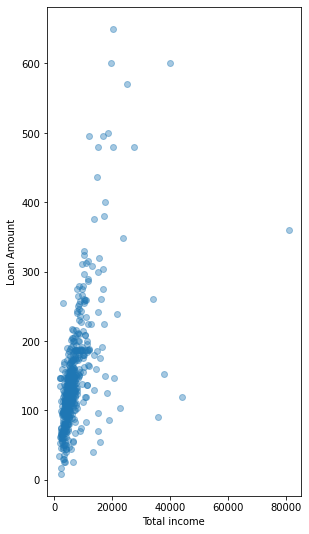

In [176]:
plt.figure(figsize = (10,9))
plt.subplot(122)
plt.scatter(data['Total_income'], data['LoanAmount'], alpha = 0.4)
plt.xlabel('Total income')
plt.ylabel('Loan Amount')

    
### Building a predictive Model


In [183]:
# Convertt all the categorical variables into numeric by encoding the categories
data['Gender'].fillna(data['Gender'].mode()[0], inplace = True)
data['Married'].fillna(data['Married'].mode()[0], inplace = True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace = True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace = True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace = True)

In [185]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed'
          , 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])
data.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
LoanAmount_log       float64
Total_income         float64
Ratio                float64
dtype: object

In [218]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_income,Ratio
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,0.025032
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,0.021015
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,0.022000
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,0.024287
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,0.023500


In [229]:
from sklearn.model_selection import train_test_split
x = data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11]]
y = data.iloc[:,12]
#splitting the data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0 )


In [216]:
# Import sckikit learn modules
from sklearn.linear_model import LogisticRegression # Logistic Regression Classifier
from sklearn.tree import DecisionTreeClassifier     # Decision Tree Classifier
from sklearn.svm import SVC                         # SVM Classifier
from sklearn.naive_bayes import GaussianNB          # Naive Bayes Classifier
from sklearn.neighbors import KNeighborsClassifier  # KNN Classifier


In [230]:
# We make some intance classifiers of the object LogisticRegression, 
# DecisionTreeClassifier, SVC, GaussianNB, KNeighborsClassifier, GaussianNB.
logistic_classifier = LogisticRegression(random_state = 0, solver='lbfgs')
decision_classifier = DecisionTreeClassifier()
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier(n_neighbors=5)
naive_classifier = GaussianNB()

# Now using these classifiers to fit our data, X_train and y_train.
# By fitting we mean we train our classifiers based on the train dataset.
# ---
# Upon running this cell, we should have classifiers that can predict 
# whether a person will buy a car or not.
# ---
# Don't worry about the output, we get GaussianNB because our Naive Bayes classifier
# is the last one to be built.
# ---
#
logistic_classifier.fit(x_train, y_train)
decision_classifier.fit(x_train, y_train)
svm_classifier.fit(x_train, y_train)
knn_classifier.fit(x_train, y_train)
naive_classifier.fit(x_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GaussianNB(priors=None, var_smoothing=1e-09)

## Logistic Regression 

Some intial hypothesis, the chances of getting a loan are higher for:
1. Applicants having a credit history
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher-education level
4. Properties in urban areas with high growth perspectives

#### First model will be with Credit History

In [231]:
logistic_y_prediction = logistic_classifier.predict(x_test) 
decision_y_prediction = decision_classifier.predict(x_test) 
svm_y_prediction = svm_classifier.predict(x_test) 
knn_y_prediction = knn_classifier.predict(x_test) 
naive_y_prediction = naive_classifier.predict(x_test) 


In [232]:
# We then import evaluation metrics to determine the accuracy of classifiers
# ---
# 
from sklearn.metrics import classification_report, accuracy_score 

# The accuracy score - is the simplest way to evaluate 
# However, we note not for a highly imbalance dataset. 
# By imbalanced we mean that our original dataset would
# need to have an equal no's of 1 and 0's
# ---
print(accuracy_score(logistic_y_prediction, y_test))
print(accuracy_score(decision_y_prediction, y_test))
print(accuracy_score(svm_y_prediction, y_test))
print(accuracy_score(knn_y_prediction, y_test))
print(accuracy_score(naive_y_prediction, y_test))
#The most accurate being knn and naive

0.8014705882352942
0.6911764705882353
0.7058823529411765
0.5882352941176471
0.7941176470588235


In [233]:
print('Logistic classifier:')
print(classification_report(y_test, logistic_y_prediction))

print('Decision Tree classifier:')
print(classification_report(y_test, decision_y_prediction))

print('SVM Classifier:')
print(classification_report(y_test, svm_y_prediction))

print('KNN Classifier:')
print(classification_report(y_test, knn_y_prediction))

print('Naive Bayes Classifier:')
print(classification_report(y_test, naive_y_prediction)) 


Logistic classifier:
              precision    recall  f1-score   support

           0       1.00      0.31      0.47        39
           1       0.78      1.00      0.88        97

    accuracy                           0.80       136
   macro avg       0.89      0.65      0.67       136
weighted avg       0.84      0.80      0.76       136

Decision Tree classifier:
              precision    recall  f1-score   support

           0       0.46      0.46      0.46        39
           1       0.78      0.78      0.78        97

    accuracy                           0.69       136
   macro avg       0.62      0.62      0.62       136
weighted avg       0.69      0.69      0.69       136

SVM Classifier:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.71      0.99      0.83        97

    accuracy                           0.71       136
   macro avg       0.36      0.49      0.41       136
weighted av

In [239]:
new_case = [[1,0,0,0,0, 1500, 60,700, 80,1,600 ]]

print(logistic_classifier.predict(new_case))
print(decision_classifier.predict(new_case))
print("Best Classifier SVM", svm_classifier.predict(new_case))
print("Best Classifier KNN", knn_classifier.predict(new_case))
print(naive_classifier.predict(new_case))

[1]
[1]
Best Classifier SVM [1]
Best Classifier KNN [0]
[0]


In [240]:
pwd


'C:\\Users\\hp\\Desktop\\Data Excerise\\Data_Portfolio'